<a href="https://colab.research.google.com/github/MaheelLakshan/Image_Segmentation_Thresholding_and_Region_Growing/blob/main/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [123]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Defining the region_growing function

In [124]:
def region_growing(img, seeds):
    # Parameters
    height, width = img.shape
    intensity_difference = 20
    neighbors = [(0, 1), (1, 0), (-1, 0), (0, -1), (-1, -1), (-1, 1), (1, -1), (1, 1)]  # 8-way connectivity

    # Initialization
    segmented = np.zeros_like(img, dtype=np.uint8)
    visited = np.zeros_like(img, dtype=np.uint8)

    for seed in seeds:
        seeds_queue = [seed]

        while len(seeds_queue) > 0:
            x, y = seeds_queue.pop(0)

            if visited[x, y] == 1:
                continue
            visited[x, y] = 1

            segmented[x, y] = 255

            for dx, dy in neighbors:
                nx, ny = x + dx, y + dy

                if 0 <= nx < height and 0 <= ny < width:
                    if visited[nx, ny] == 0 and abs(int(img[nx, ny]) - int(img[x, y])) <= intensity_difference:
                        seeds_queue.append((nx, ny))

    return segmented

Loading and resizing the image

In [125]:
img = cv2.imread('/content/Image.jpg', cv2.IMREAD_GRAYSCALE)
# resize image
img = cv2.resize(img, (512, 512))
print(img.shape)

(512, 512)


Display image

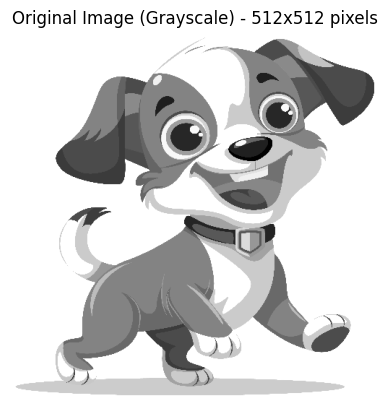

In [126]:
plt.imshow(img, cmap='gray')
plt.title('Original Image (Grayscale) - 512x512 pixels')
plt.axis('off')
plt.show()

Define seed points

In [127]:
seed_points = [(200, 310),(280,80), (470,70),(350,300),(40,260),(240,290)]

Perform region growing

In [128]:
segmented_regions = region_growing(img, seed_points)

Display the result

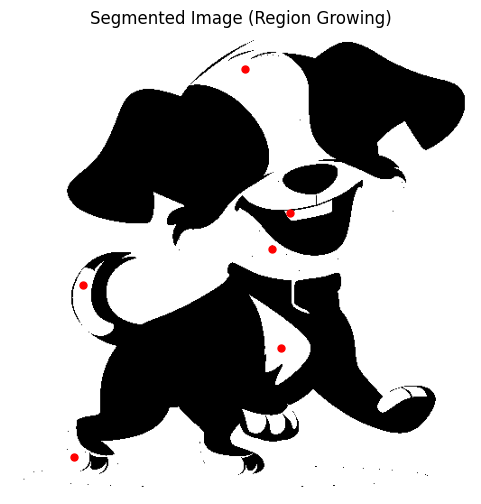

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('Segmented Image (Region Growing)')
fig.set_size_inches(6, 6)
ax.imshow(segmented_regions, cmap='gray')
ax.axis('off')


#Highlight seed points
for seed in seed_points:
    ax.plot(seed[1], seed[0], 'ro', markersize=5)  # Red circles at seed points

plt.show()

